In [1]:
import pandas as pd
import glob
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

In [ ]:
# I did not run this code for the latest dataset because it wasn't found to be an approapriate analysis for the earlier dataset.

In [2]:
direc = r'./dataFolders/Output/Step6_v4/'
outpath_fig = r'./dataFolders/Output/Step6_v4/Figure/'

In [3]:
data_df = pd.read_csv(direc + 'AllLight_EveryMoth.csv')
data_df.head()
data_df['lightLevel'] = data_df['name'].str.split('_', n = 1, expand=True)[0] 
data_df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 
                        'In_Frame', 'Out_Frame', 'Proboscis'], inplace = True)
data_df['DiscoveryTime']= data_df['DiscoveryTime']/100

In [4]:
# do a binary plot for the discovery Time
data_df.loc[data_df.DiscoveryTime.notnull(), 'Binary'] = 1
data_df.loc[data_df.DiscoveryTime.isnull(), 'Binary'] = 0

In [5]:
subset = data_df.dropna(axis = 0)
subset['logDiscoveryTime'] = np.log(subset['DiscoveryTime'])
# subset.loc[subset.lightLevel == 'L0.1', 'lightLevel'] = -0.5
# subset.loc[subset.lightLevel == 'L50', 'lightLevel'] = 0.5

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
subset_low = subset[subset.lightLevel == 'L0.1']
subset_high = subset[subset.lightLevel == 'L50']
subset_low.head()

,DiscoveryTime,trialNum,name,lightLevel,Binary,logDiscoveryTime
7,2.82,0,L0.1_c-3_m20,L0.1,1.0,1.036737
8,2.83,1,L0.1_c-3_m20,L0.1,1.0,1.040277
9,1.32,2,L0.1_c-3_m20,L0.1,1.0,0.277632
10,1.45,3,L0.1_c-3_m20,L0.1,1.0,0.371564
11,1.31,4,L0.1_c-3_m20,L0.1,1.0,0.270027


In [7]:
subset_low_binary = data_df[data_df.lightLevel == 'L0.1']
subset_high_binary = data_df[data_df.lightLevel == 'L50']

## Plot individual panels

In [8]:
# plot each animal as a single panel
def plotInd(ax_function, x, y, ylabel = False):
    ax_function.plot(x, y, 'o')
    plt.ylim([-2, 30])
    plt.xlim([-2, 50])
    
    if not ylabel:
        ax_function.axes.get_yaxis().set_visible(False)

In [9]:
# plot each animal's binary response as a single panel 
def plotIndBinary(ax_function, x, y, ylabel = False):
    ax_function.plot(x, y, 'o-')
    plt.ylim([-0.1,1.1])
#     plt.xlim([-2, 50])
    
    if not ylabel:
        ax_function.axes.get_yaxis().set_visible(False)

In [10]:
print(len(subset_low.name.unique()))
subset_low.DiscoveryTime.max()

22


67.33

In [11]:
print(len(subset_high.name.unique()))
subset_high.DiscoveryTime.max()

17


26.28

In [12]:
fig_width = 7.5
fig_height = 7.5
p1_width = 1/4

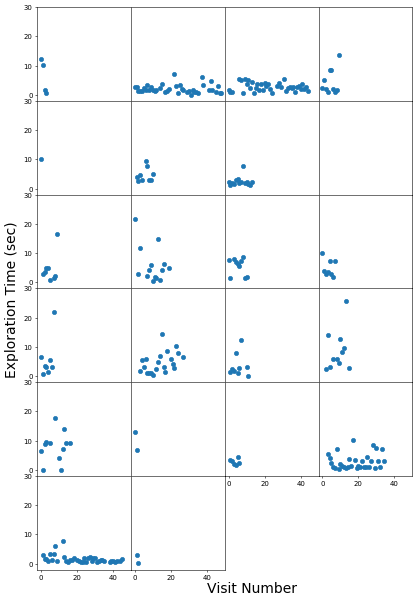

In [47]:
fig = plt.figure(figsize=(fig_width,fig_height),
                 dpi = 50)

num_of_ax = len(subset_low.name.unique())

p1_xposition = 0
p1_yposition = 0
i = 0
ylabel = True
for moth, df_moth in subset_low.groupby('name'):
    ax0= plt.axes( [p1_xposition, p1_yposition,
               p1_width, p1_width] ) 
    plotInd(ax0, df_moth.trialNum, df_moth.DiscoveryTime, ylabel)
    
    i+=1
    p1_xposition+=p1_width
    if i in [0, 4, 8, 12, 16, 20]:
        p1_yposition-=p1_width
        p1_xposition=0
        ylabel = True
    else:
        ylabel = False
        
ax = fig.axes
ax[12].text(-20, 0.5, 'Exploration Time (sec)', 
           rotation = 'vertical',
          size = 20,
           )
ax[21].text(40, -10, 'Visit Number', 
           rotation = 'horizontal',
          size = 20)

fig.savefig('./dataFolders/Output/Step6_v4/Figure/IndividualLearning_low.png', bbox_inches='tight')

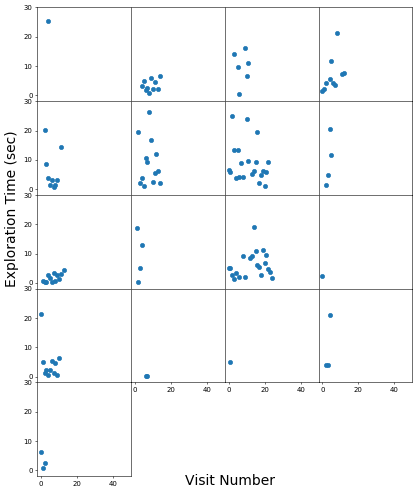

In [51]:
fig = plt.figure(figsize=(fig_width,fig_height),
                 dpi = 50)

num_of_ax = len(subset_high.name.unique())

p1_xposition = 0
p1_yposition = 0
i = 0
ylabel = True
for moth, df_moth in subset_high.groupby('name'):
    ax0= plt.axes( [p1_xposition, p1_yposition,
               p1_width, p1_width] ) 
    plotInd(ax0, df_moth.trialNum, df_moth.DiscoveryTime, ylabel)
    i+=1
    p1_xposition+=p1_width
    
    if i in [4, 8, 12, 16, 20]:
        p1_yposition-=p1_width
        p1_xposition=0
        ylabel = True
    else:
        ylabel = False
        

ax = fig.axes
ax[8].text(-20, -0.5, 'Exploration Time (sec)', 
           rotation = 'vertical',
          size = 20,
           )
ax[16].text(80, -5, 'Visit Number', 
           rotation = 'horizontal',
          size = 20)

fig.savefig('./dataFolders/Output/Step6_v4/Figure/IndividualLearning_high.png', bbox_inches='tight')

29


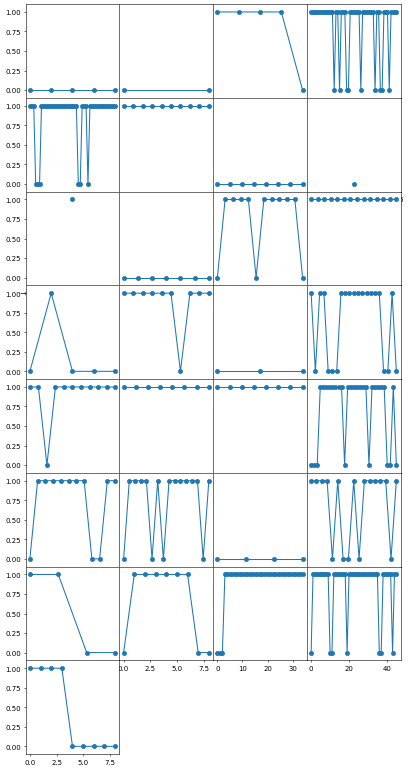

In [55]:
# plot binary response

fig = plt.figure(figsize=(fig_width,fig_height),
                 dpi = 50)
print(len(subset_low_binary.name.unique()))

p1_xposition = 0
p1_yposition = 0
i = 0
ylabel = True
for moth, df_moth in subset_low_binary.groupby('name'):
    ax0= plt.axes( [p1_xposition, p1_yposition,
               p1_width, p1_width] ) 
    plotIndBinary(ax0, df_moth.trialNum, df_moth.Binary, ylabel)
    
    i+=1
    p1_xposition+=p1_width
    if i in [0, 4, 8, 12, 16, 20, 24, 28]:
        p1_yposition-=p1_width
        p1_xposition=0
        ylabel = True
    else:
        ylabel = False
        
fig.savefig('./dataFolders/Output/Step6_v4/Figure/IndividualBinaryResponse_low.png', bbox_inches='tight')

26


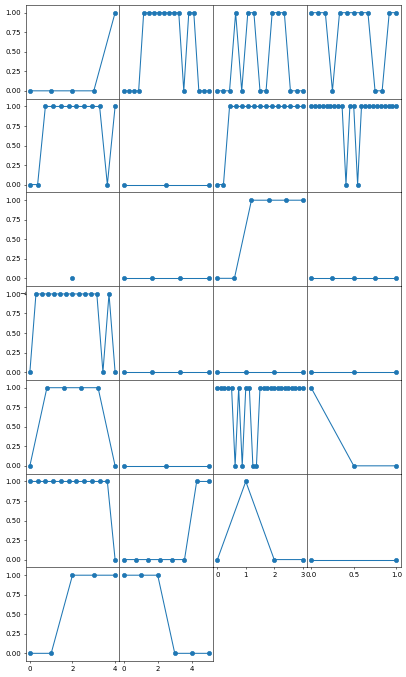

In [16]:
fig = plt.figure(figsize=(fig_width,fig_height),
                 dpi = 50)
print(len(subset_high_binary.name.unique()))

p1_xposition = 0
p1_yposition = 0
i = 0
ylabel = True
for moth, df_moth in subset_high_binary.groupby('name'):
    ax0= plt.axes( [p1_xposition, p1_yposition,
               p1_width, p1_width] ) 
    plotIndBinary(ax0, df_moth.trialNum, df_moth.Binary, ylabel)
    
    i+=1
    p1_xposition+=p1_width
    if i in [0, 4, 8, 12, 16, 20, 24, 28]:
        p1_yposition-=p1_width
        p1_xposition=0
        ylabel = True
    else:
        ylabel = False
        
fig.savefig('./dataFolders/Output/Step6_v4/Figure/IndividualBinaryResponse_high.png', bbox_inches='tight')

## build the linear Mixed effect model

In [17]:
subset.head()

,DiscoveryTime,trialNum,name,lightLevel,Binary,logDiscoveryTime
7,2.82,0,L0.1_c-3_m20,L0.1,1.0,1.036737
8,2.83,1,L0.1_c-3_m20,L0.1,1.0,1.040277
9,1.32,2,L0.1_c-3_m20,L0.1,1.0,0.277632
10,1.45,3,L0.1_c-3_m20,L0.1,1.0,0.371564
11,1.31,4,L0.1_c-3_m20,L0.1,1.0,0.270027


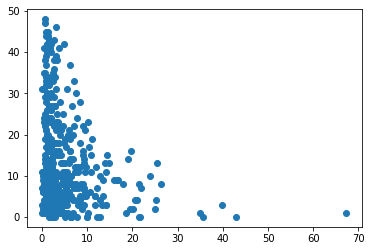

In [18]:
import matplotlib.pyplot as plt
plt.plot(subset.DiscoveryTime, subset.trialNum, 'o')

In [19]:
# mixed effect model for the y = Discovery Time, x = trial Num, categorical x = light level, 
# random effect = name, each with its own slope wrt trialNum

In [20]:
md = smf.mixedlm("DiscoveryTime ~ C(lightLevel) + trialNum", subset, groups=subset['name'], re_formula='~trialNum')
mdf = md.fit(method = 'lbfgs')
print(mdf.summary())

             Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  DiscoveryTime
No. Observations:   436      Method:              REML         
No. Groups:         39       Scale:               31.4600      
Min. group size:    1        Log-Likelihood:      -1401.9731   
Max. group size:    40       Converged:           Yes          
Mean group size:    11.2                                       
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             6.615    1.149  5.759 0.000  4.364  8.867
C(lightLevel)[T.L50]  2.352    1.233  1.908 0.056 -0.065  4.770
trialNum             -0.171    0.057 -3.017 0.003 -0.282 -0.060
Group Var            30.446    1.759                           
Group x trialNum Cov -1.377                                    
trialNum Var          0.062                          

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


### same as above but put in log(discovery Time)

In [21]:
md = smf.mixedlm("logDiscoveryTime ~ C(lightLevel) + trialNum", subset, groups=subset['name'], re_formula='~trialNum')
mdf = md.fit(method = 'lbfgs')
print(mdf.summary())

             Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: logDiscoveryTime
No. Observations:  436     Method:             REML            
No. Groups:        39      Scale:              0.8588          
Min. group size:   1       Log-Likelihood:     -617.2903       
Max. group size:   40      Converged:          Yes             
Mean group size:   11.2                                        
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             1.273    0.146  8.732 0.000  0.987  1.558
C(lightLevel)[T.L50]  0.065    0.225  0.287 0.774 -0.376  0.505
trialNum             -0.004    0.009 -0.509 0.611 -0.021  0.012
Group Var             0.282    0.174                           
Group x trialNum Cov -0.001    0.009                           
trialNum Var          0.000    0.000                 

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


## model the two categories (high and low light) separately

In [22]:
md = smf.mixedlm("DiscoveryTime ~ trialNum", subset_low, groups=subset_low['name'], re_formula='~trialNum')
mdf = md.fit(method = 'powell')
print(mdf.summary())

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:1492: RuntimeWarning: invalid value encountered in log
  likeval -= (self.n_totobs - self.k_fe) * np.log(qf) / 2.


             Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  DiscoveryTime
No. Observations:   304      Method:              REML         
No. Groups:         22       Scale:               31.8101      
Min. group size:    1        Log-Likelihood:      -974.4851    
Max. group size:    40       Converged:           Yes          
Mean group size:    13.8                                       
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             7.670    1.159  6.616 0.000  5.398  9.942
trialNum             -0.248    0.078 -3.179 0.001 -0.401 -0.095
Group Var            20.439    1.065                           
Group x trialNum Cov -1.085    0.020                           
trialNum Var          0.058                                    



In [23]:
md = smf.mixedlm("DiscoveryTime ~ trialNum", subset_high, groups=subset_high['name'], re_formula='~trialNum')
mdf = md.fit(method = 'lbfgs')
print(mdf.summary())

             Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  DiscoveryTime
No. Observations:   132      Method:              REML         
No. Groups:         17       Scale:               33.9704      
Min. group size:    1        Log-Likelihood:      -427.1865    
Max. group size:    21       Converged:           Yes          
Mean group size:    7.8                                        
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             6.744    1.287  5.240 0.000  4.221  9.266
trialNum             -0.003    0.096 -0.027 0.978 -0.190  0.185
Group Var            13.811    2.917                           
Group x trialNum Cov -0.604    0.224                           
trialNum Var          0.027    0.016                           



C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2170: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [24]:
## check what this means?

data = sm.datasets.get_rdataset("dietox", "geepack").data
data.head()

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
0,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1
1,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
2,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
3,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
4,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5


In [26]:
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
mdf = md.fit()
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.394    2.149                            
========================================================

"""

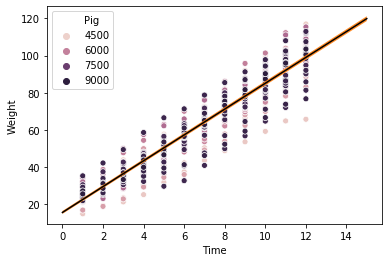

In [25]:
import seaborn as sns

ax = sns.scatterplot('Time', 'Weight', data = data, hue = 'Pig')

x = np.asarray([0, 5, 15])
y = 15.724 + x *6.943
y_err_1 = 15.724 + 0.788 + x*(6.943+0.033)
y_err_0 = 15.724 - 0.788 + x*(6.943-0.033)
ax.plot(x, y, color = 'black')
ax.fill_between(x, y_err_0, y_err_1, alpha = 0.9)